# <font color='#3d59c6'> MD004 SESIÓN REGRESIÓN LINEAL </font>

En esta sesión modelaremos la relación entre una variable dependiente (la que queremos predecir) y una variable explicativa + un error (la diferencia entre la predicción y el real) mediante un <font color='#C90076'>**Modelo de Regresión Simple**</font>

1. Recordad que <font color='#C90076'>**el análisis de regresión es un proceso estadístico para encontrar las relaciones dentro de un conjunto de datos** </font>, es decir <u>encontrar la mejor línea recta</u> a través de puntos de observación.

2. Con el enfoque clave en las relaciones entre las variables independientes (predictores) y una variable dependiente (target).

3. Este método <font color='#C90076'>**asume que existe una relación lineal entre los predictores y el resultado** </font>.
Por último, la regresión lineal tiene la <u>ventaja de la interpretabilidad</u>, pero hay que realizar algunas <u>comprobaciones importantes</u>.

4. Utilizaremos <font color='#C90076'>**el modelo frecuentista**</font> [1], los parámetros serán estimados para dar la línea mejor ajustada, minimizando la suma de los cuadrados residuales (método de mínimos cuadrados ordinarios).

<br>
<div>
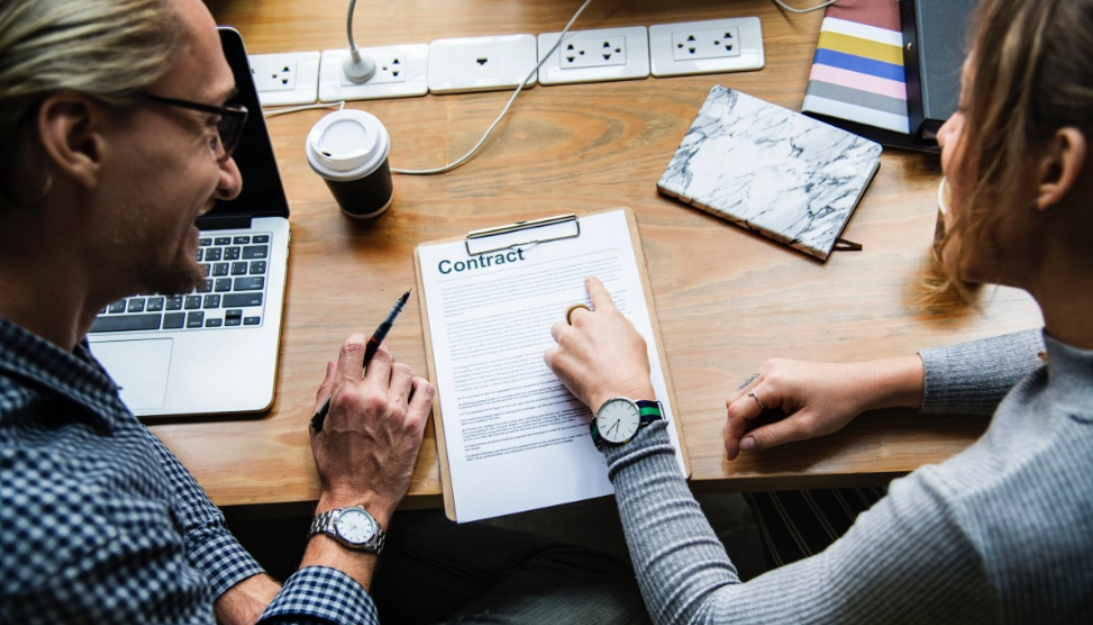
</div>

<font color='#3d59c6'>**DATA**</font>: En este ejemplo utilizaremos el dataset: **202311_04_DataSalary.csv**

<font color='#3d59c6'>**OBJETIVO:**</font> Predecir el salario de un individuo (variable <font color='#C90076'>**Salary** </font>) partiendo de la variable explicativa Años de experiencia (**YearsExperience**).

<font color='#3d59c6'>**PASOS:**</font> 

0. Carga de Packages
1. Carga de datos
2. Realizar análisis descriptivo:
    - principales estadísticos
    - graficación
3. Construcción Modelo Regresión Lineal Simple
4. Validación de nuestro modelo
5. Conclusión


## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **olsrr:** lo utilizaremos al trabajar con modelos de regresión lineal, ya que las funciones de esta librería nos proporcionará los outputs de resumen y visualización de los modelos de regresión lineal, así como las funciones para evaluar la calidad del modelo ( por ejemplo gráficos de residuos)
- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **caret:** Nos ayudará a la hora de evaluar un modelo de aprendizaje automático, sobretodo en el proceso de ajuste de hiperparámetros cuando busquemos optimizarlo. Además, contiene funciones para realizar validación cruzada
- **lmtest:** Con esta librería podremos realizar las pruebas de heterocedasticidad, autocorrelación y normalidad de los residuos de nuestro modelo (validar el modelo)
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área
- **broom:** nos ayudará a la hora de trabajar con los resultados de nuestros modelos creando estructuras más fáciles de manejar o más organizadas

In [1]:
install.packages("olsrr")
library(olsrr)
library(tidyverse)
library(caret)
library(lmtest)
library(gridExtra)
library(broom)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

- Variable dependiente (target) **Salary**
- Variable explicativa o predictora **YearsExperience**

In [2]:
#subimos el fichero 202311_04_DataSalary.csv a nuestro entorno jupyter 
#carpeta donde vayamos a desarrollar el código
#cargamos nuestro dataset en data_ab y checkeamos los datos cargados

data_salary = read.csv(file='202311_04_DataSalary.csv', header=TRUE, sep=',', dec='.')
head(data_salary)#de forma predefinida retorna las primeras 6 observations
tail(data_salary)#de forma predefinida retorna las últimas 6 observations

,YearsExperience,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642


,YearsExperience,Salary
,<dbl>,<dbl>
25,8.7,109431
26,9.0,105582
27,9.5,116969
28,9.6,112635
29,10.3,122391
30,10.5,121872


## <font color='#3d59c6'>  2. REALIZAR ANÁLISIS DESCRIPTIVO </font>

In [3]:
str(data_salary) 

'data.frame':	30 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary         : num  39343 46205 37731 43525 39891 ...


Tenemos un total de 30 observaciones y ambas variables mencionadas son **continuas**, por lo tanto >> **podemos aplicar Regresión sobre el conjunto de datos**

In [4]:
summary(data_salary)

 YearsExperience      Salary      
 Min.   : 1.100   Min.   : 37731  
 1st Qu.: 3.200   1st Qu.: 56721  
 Median : 4.700   Median : 65237  
 Mean   : 5.313   Mean   : 76003  
 3rd Qu.: 7.700   3rd Qu.:100545  
 Max.   :10.500   Max.   :122391  

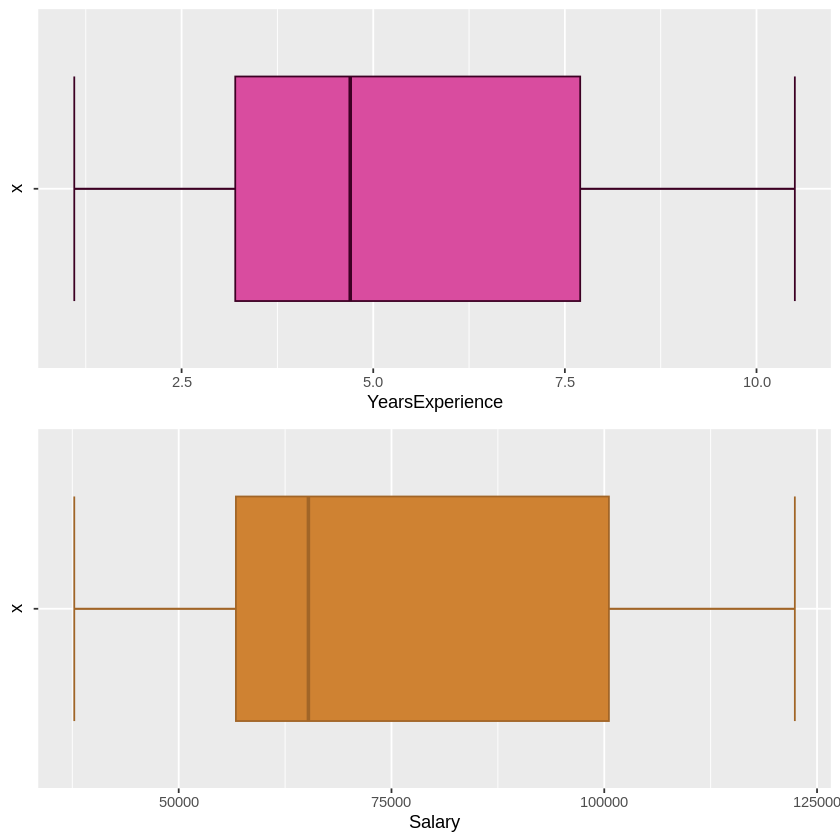

In [5]:
a= ggplot(data = data_salary, aes(x = "", y = YearsExperience)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
b= ggplot(data = data_salary, aes(x = "", y = Salary)) +
       stat_boxplot(geom = "errorbar" ,color = "#a16527") +
       geom_boxplot(fill = "#cf8232",color = "#a16527") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

Ahora, la pregunta es: 
**¿Qué tipo de regresión (lineal o no lineal) debemos aplicar?**
Hay muchos tipos de regresión lineal. **¿Cuál será mejor para este conjunto de datos dado?**

**Respuesta:** Como solo tengo un Predictor, la posibilidad es ajustar Regresión lineal simple o Regresión polinomial (generalmente, polinomio ortogonal para evitar la multicolinealidad) en una variable.

**¿Cuál de las dos Regresiones lineales anteriores funcionará mejor?**

**Respuesta:** Hagamos el diagrama de dispersión entre el predictor (en el eje X) y el objetivo (en el eje Y). Esto nos a visualizar la relación entre estas 2 variables.

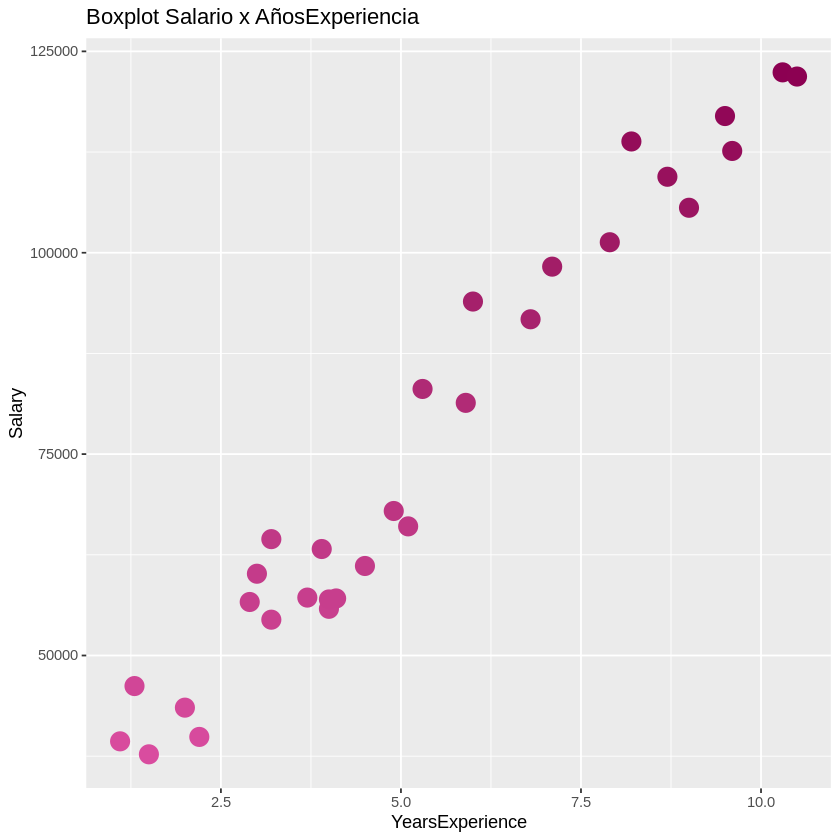

In [6]:
ggplot(data_salary) +
  aes(x = YearsExperience
      ,y = Salary
      ,color = Salary) +
   geom_point(size = 5
             ,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot Salario x AñosExperiencia " )

## <font color='#3d59c6'>  3. CONSTRUCCIÓN MODELO REGRESIÓN LINEAL SIMPLE </font>

El gráfico anterior muestra la relación lineal entre el predictor y el objetivo. Así que **la regresión lineal simple funcionará mejor**.

Siguientes pasos:

<font color='#3d85c6'> **1. ANTES DE GENERAR EL MODELO**</font>

- **Comprobaremos Linealidad**: debe ser una relación lineal entre el predictor y el objetivo.
- **División del dataset**: se dividirá el dataset entre Train y Test

<font color='#3d85c6'> **2. GENERAMOS MODELO**</font>

<font color='#3d85c6'> **3. DESPUÉS DE GENERAR EL MODELO**</font>

Comprobaremos las siguientes suposiciones:
- **Normalidad**: los errores deben distribuirse normalmente
- **Homocedasticidad**: los errores deben tener varianza constante
- **Autocorrelación**: los errores deben no estar correlacionados (los errores deben ser independientes)
- Los errores deben tener una **media de cero**


- Comprobación: existencia Outliers

Los supuestos anteriores han de cumplirse, porque si alguno de los supuestos anteriores no se cumple, entonces no podemos estar seguros de la validez y confiabilidad de los resultados obtenidos. Si no fuese así, hay que aplicar cualquier otro método de regresión para obtener un resultado confiable.

### <font color='#3d59c6'>  3.1 COMPROBACIÓN LINEALIDAD </font>

Visualización: El diagrama de dispersión entre Predictor y Target nos ayuda. (Ya se trazó arriba y encontró linealidad).

Prueba estadística: **Pearson**: prueba de correlación.

In [7]:
cor.test(data_salary$YearsExperience , data_salary$Salary)


	Pearson's product-moment correlation

data:  data_salary$YearsExperience and data_salary$Salary
t = 24.95, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9542949 0.9897078
sample estimates:
      cor 
0.9782416 


Dado que, el valor **p-value es menor que 0.05 >> rechazamos H0** (es decir correlación igual a 0) y la correlación muestral es 0.9782416, existe una alta correlación significativa (altamente relacionada linealmente) en la población.

Las suposiciones restantes se comprobarán después de ajustar el modelo.



### <font color='#3d59c6'>  3.2 DIVISIÓN DATA SET TRAIN & TEST </font>

Antes de ajustar, dividimos el conjunto de datos en 2 grupos: test y train de forma aleatoria

**>>set.seed():** la utilizamos para fijar una semilla a la hora de generar de números aleatorios. Esto nos da el control sobre "la aleatoriedad" de la división train & test haciendo que la generación de dicha división sea reproducible, además de poder comparar modelos, tras modificar nuestros parámetros, evitando el sesgo derivado de esa selección aleatoria

In [8]:
set.seed(500) 

# Creamos el data partition de la función caret con un 60 - 40 split
inTrain = createDataPartition(y = data_salary$Salary
                              ,p = 0.6
                              , list = FALSE
                              , times = 1)

data_train  = data_salary[inTrain, ]
data_test = data_salary[-inTrain, ]

In [9]:
str(data_train)

'data.frame':	20 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2.2 3.2 3.2 3.9 4 4.1 4.5 ...
 $ Salary         : num  39343 46205 37731 39891 54445 ...


### <font color='#3d59c6'>  3.3 MODELO DE AJUSTE </font>

Ajustamos el modelo y obtenemos un resumen del modelo:

In [10]:
modelo_lm = lm(Salary ~ YearsExperience , data = data_train) # Entrenamos el modelo
summary(modelo_lm)


Call:
lm(formula = Salary ~ YearsExperience, data = data_train)

Residuals:
   Min     1Q Median     3Q    Max 
 -8136  -5633  -1094   5752  11321 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      26255.9     3164.6   8.297 1.45e-07 ***
YearsExperience   9393.9      539.9  17.399 1.05e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6623 on 18 degrees of freedom
Multiple R-squared:  0.9439,	Adjusted R-squared:  0.9408 
F-statistic: 302.7 on 1 and 18 DF,  p-value: 1.051e-12


- **coefficients:** nos dará los coeficientes estimados del modelo. En nuestro caso tendremos un coeficiente para la constante (el valor de Y cuando X es igual a cero)  y otro para la variable predictora (nos dice cuánto cambiará la variable dependiente por unidad de cambio en X). En nuestro caso nos indica que en promedio Y aumentará en **9393.9** unidades por cada unidad adicional de X. Por otro lado, observamos que cuando X sea 0 (sin años de experiencia) el valor del salario sería aprox **26256** Además **Ambos coeficientes son estadísticamente significativos ya que el valor p <0.05** (nos indica que hay una relación significativa entre la variable predictora y la variable dependiente)

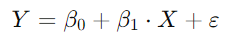

- **p.value:** en este caso estamos ante un modelo de regresión lineal simple, donde ya hemos visto que YearsExperience mantiene una relación significativa con Salary.
- **df.residual:** nos indicará los grados de libertad residuales = núm.observaciones - núm.parámetros estimados >> 18
- **sigma (residual standard error):** indica la desviación estándar de los residuos y por lo tanto el grado de dispersión de los residuos alrededor de la línea de regresión. En este caso, es 6623
- **r.squared:** nos dice qué parte de la varianza de nuestra variable dependiente es explicada por nuestro modelo >> 0.9439
- **R-cuadrado ajustado**: 0.9408, esto muestra que el 94% de la variación disponible en el conjunto de datos dado (en salario) se explica por este modelo de regresión lineal simple. El 5% restante de variación en el salario podría deberse a otros predictores (como el puesto, la edad de los individuos) o debido a una causa aleatoria.

Además podemos obtener diferentes atributos resultantes del modelo, por ejemplo:
- **residuals:** contiene los residuos del modelo >> las diferencias entre los valores observados y los valores predichos por el modelo.
- **fitted.values:** aquí encontraremos para cada registro los valores predichos por nuestro modelo
- **call**: nos recuerda la configuración de nuestro modelo

In [11]:
resumen_modelo = summary(modelo_lm)
resumen_modelo$r.squared
resumen_modelo$sigma #Residual standard error
attributes(modelo_lm)
modelo_lm$coefficients

[1] 0.9438782

[1] 6622.833

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

(Intercept) YearsExperience 
      26255.929        9393.865

In [12]:
modelo_lm$residuals

1          2          3          5          8          9         11 
 2753.8194  7737.0463 -2615.7267 -7031.4322 -1871.2972  8128.7028   325.9972 
        13         14         15         17         18         19         20 
-6874.3893 -7689.7758 -7417.3218 -8135.6408  7044.5862  -316.7328 11320.8807 
        22         23         24         26         28         30 
 5320.6291   834.5371 10526.3776 -5218.7144 -3802.0335 -3019.5120

In [13]:
modelo_lm$fitted.values

1         2         3         5         8         9        11        13 
 36589.18  38467.95  40346.73  46922.43  56316.30  56316.30  62892.00  63831.39 
       14        15        17        18        19        20        22        23 
 64770.78  68528.32  74164.64  76043.41  81679.73  82619.12  92952.37 100467.46 
       24        26        28        30 
103285.62 110800.71 116437.03 124891.51

### <font color='#3d59c6'>  3.4 COMPROBAMOS EL RESTO DE SUPUESTOS: </font>


### <font color='#3d59c6'>  ***Normalidad:*** </font>

- Visualización: Q-Q Plot de residuos.
- Prueba estadística: la prueba de Shapiro-wilk sobre los residuos (muestras con pocas observaciones).

H0: La variable presenta una distribución normal
<br>
H1: La variable presenta una distribución no normal


Sig(p valor) > 0.05: No rechazar H0 (normal)
<br>
Sig(p valor) < 0.05: Rechazar H0



	Shapiro-Wilk normality test

data:  modelo_lm$residuals
W = 0.92084, p-value = 0.1029


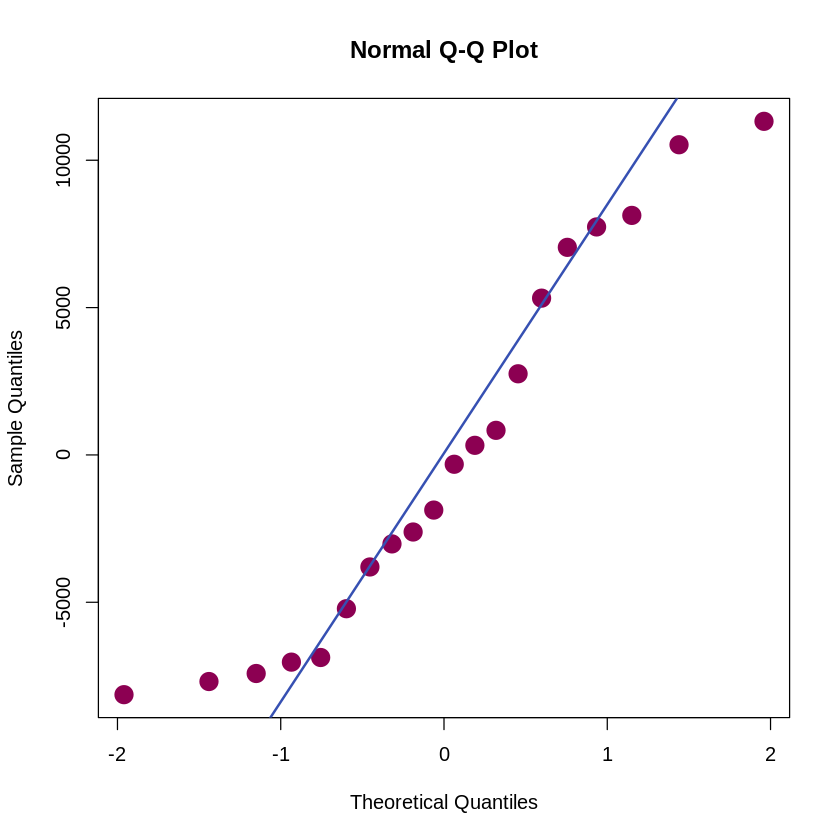

In [14]:
# Visualization
qqnorm(modelo_lm$residuals,pch =19,col ="#8c0052", cex=2)
qqline(modelo_lm$residuals , col = "#3650b2", lwd = 2 )  

# Statistical Test
shapiro.test(modelo_lm$residuals)

No es una distribución muy muy normal, pero el p-value no es despreciable....
Dado que el valor p (0.1029) > 0.05, por lo tanto, aceptamos la hipótesis nula, es decir, los errores se distribuyen normalmente.

### <font color='#3d59c6'>  ***Homocedasticidad:*** </font>

- Visualización: Residuos vs valores ajustados.

- Prueba estadística: la prueba de Breusch Pagan


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 0.0016004, df = 1, p-value = 0.9681


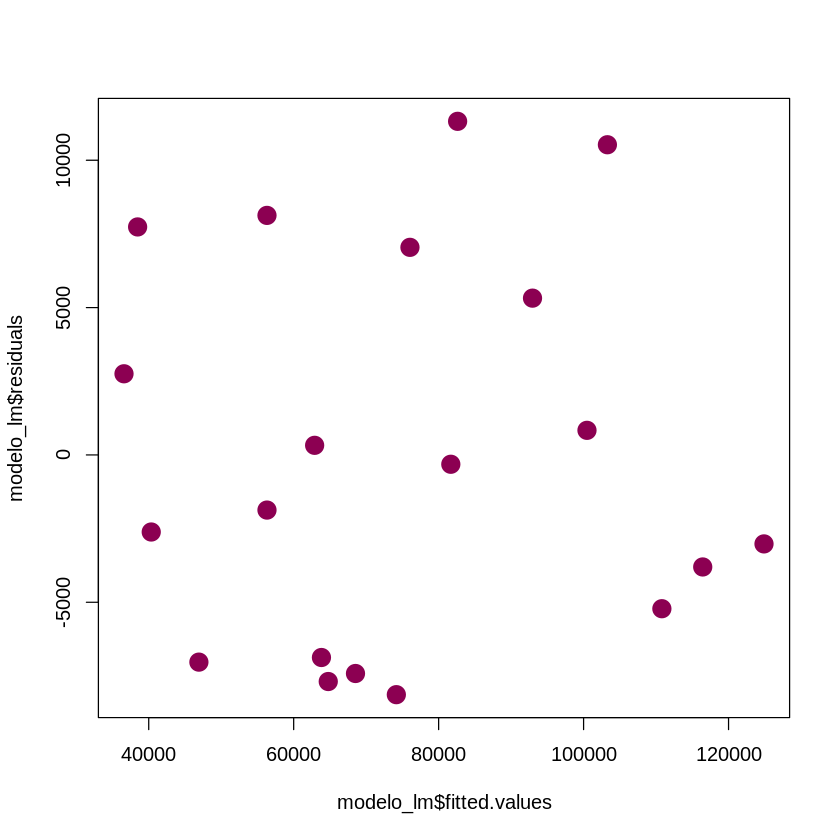

In [15]:
# Visualization
plot(modelo_lm$fitted.values , modelo_lm$residuals , pch =19,col ="#8c0052", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm)

Dado que el valor p (0.9681)> 0.05, por lo tanto, acepte la hipótesis nula, es decir, los errores tienen varianza constante.

### <font color='#3d59c6'>  ***Autocorrelación:*** </font>

- Visualización: Residual vs Orden de toma de observaciones.
- Prueba estadística: la prueba de Durbin-Watson.


	Durbin-Watson test

data:  modelo_lm
DW = 1.5361, p-value = 0.1815
alternative hypothesis: true autocorrelation is not 0


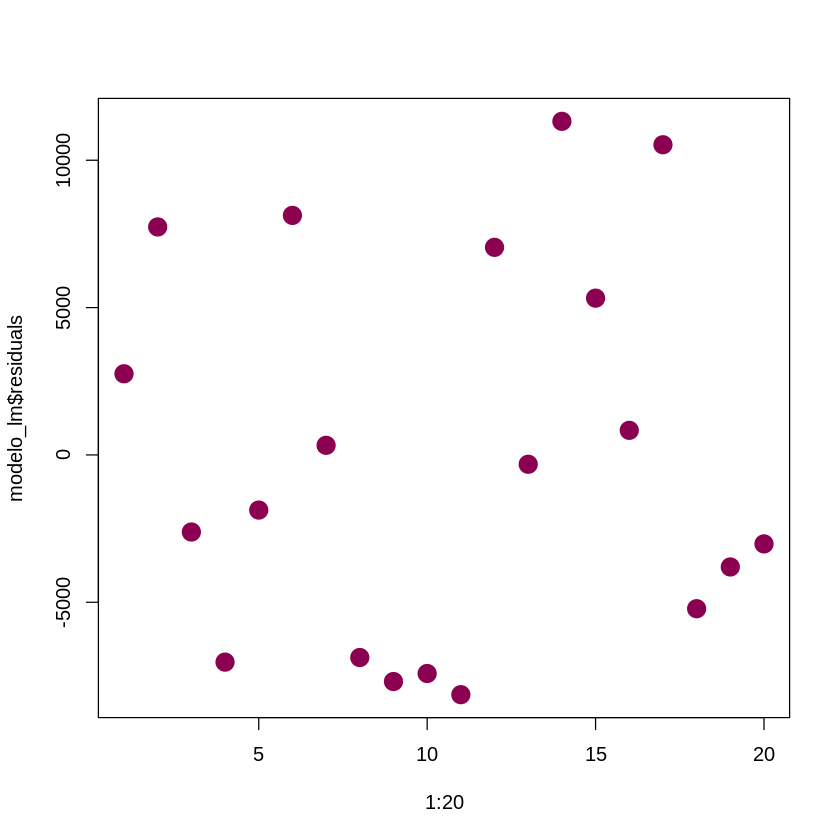

In [16]:
# Visualization
plot(1:20 , modelo_lm$residuals, pch =19,col ="#8c0052", cex=2)

# Statistical Test
dwtest(modelo_lm,  alternative = c("two.sided"))

Dado que el valor p (0,1349)> 0,05; Por lo tanto, acepte la hipótesis nula, es decir, los errores no están correlacionados.

### <font color='#3d59c6'>  ***Media de errores:*** </font>


In [17]:
# Calcular la media de errores
mean(modelo_lm$residuals)

[1] -1.390665e-13

El resultado anterior muestra que la media de errores es aproximadamente cero.
<br>
Por lo tanto, **se han cumplido todos los supuestos de la regresión lineal simple**.

### <font color='#3d59c6'>  ***Detección de Outliers:*** </font>

Una tarea más es detectar si hay algún Outlier en el conjunto de datos dado. Porque si hay un Outlier, el resultado obtenido anteriormente no será confiable. Por tanto, existe la necesidad de detectar su existencia.

Visualización y Prueba estadística: la **Distancia de Cook** (estima la influencia de un punto en la regresión). Esta prueba consiste en observar los coeficientes del modelo cuando se elimina una observación en comparación con cuando se incluye.

No existe una regla fija que nos ayude a determinar donde fijar el humbral, aunque si se suele valorar a partir de > 4/n 

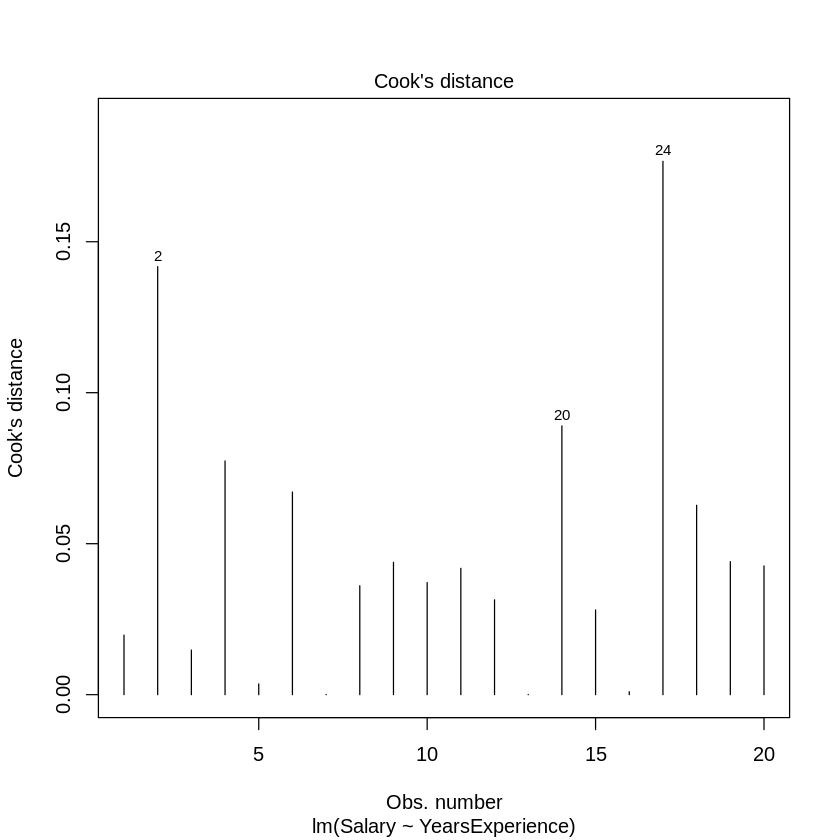

In [18]:
# Visualization (Cook's distance plot)
plot(modelo_lm , 4)
# Statistical Measure: 
model_dm = augment(modelo_lm)

In [19]:
# Checking Highest Cook's distance
max(model_dm$.cooksd)

[1] 0.1766281

La distancia máxima de Cook es 0.176628084143824

Dado que, para cualquier observación en el **conjunto de datos TRAIN**, la distancia de Cook no es mayor que 4/N, por lo tanto, no hay Outliers en el conjunto de datos dado.

## <font color='#3d59c6'>  4. VALIDACIÓN DE NUESTRO MODELO </font>

El modelo de regresión lineal simple está listo.

A partir del conjunto de datos TEST (data_test) verificamos el rendimiento ya que es un conjunto de datos "ciego", es decir, determina qué tan bien funcionará este modelo en datos no vistos.

Esto se hará nuevamente mediante dos métodos:

- Visualización: el gráfico de salario previsto frente a salario real para el conjunto de datos TEST.
- Medida estadística: R2, RMSE, MAE ayuda.

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.9810397,3875.209,3172.981


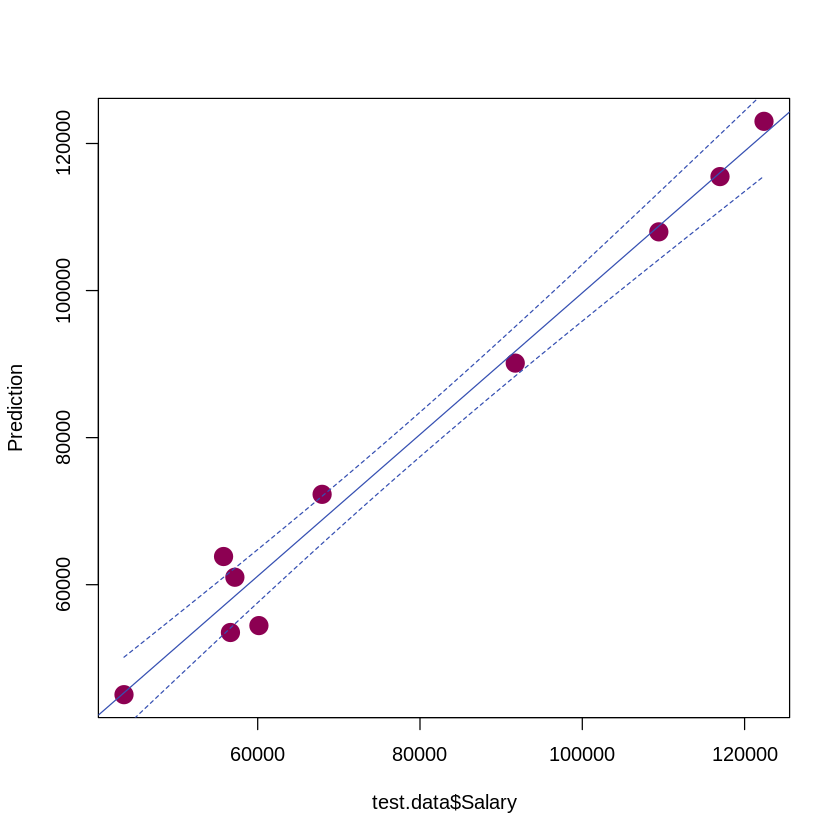

In [20]:
# Making prediction
prediction = predict(modelo_lm, data_test)

### Visualization
plot(data_test$Salary, prediction, xlab="test.data$Salary", ylab="Prediction", pch =19,col ="#8c0052", cex=2)

#add fitted regression line
lm.out = lm(prediction ~ Salary, data = data_test)
newx = seq(min(data_test$Salary),max(data_test$Salary),by = 0.05)
conf_interval = predict(lm.out, newdata=data.frame(Salary=newx), interval="confidence", level = 0.95)
abline(lm.out, col = "#3650b2")

#add conf_interval lines
lines(newx, conf_interval[,2], col="#3650b2", lty=2)
lines(newx, conf_interval[,3], col="#3650b2", lty=2)

# Statistical Measure
data.frame( R2 = R2(prediction, data_test$Salary),
            RMSE = RMSE(prediction, data_test$Salary),
            MAE = MAE(prediction, data_test$Salary))

**R2:** se obtiene un 0.981, esto significa que cerca del 98% de la variabilidad de mi variable respuesta Salary es explicada por el modelo. Al ser un valor cercano a 1 nos indica un buen ajuste del modelo

**RMSE - Error Cuadrático Medio:** en promedio, las predicciones difieren alrededor de 3875.21 unidades de la variable de respuesta

**MAE - Error Absoluto Medio:** este indicador es la media de las diferencias absolutas entre las predicciones y los valores reales. Inferior al RMSE, la diferencia media entre variable respuesta y predicción es de 3172.98 

## <font color='#3d59c6'>  5. CONCLUSIONES </font>

Nuestro objetivo era desarrollar un modelo que nos permitiese **estimar el salario de una persona a partir de los años de experiencia** de esta.

El **dataset** para desarrollar dicho modelo constaba de **40 observaciones con 2 variables continuas**: Salary (variable respuesta) y YearsExperience (variable explicativa). En el análisis descriptivo mediante un diagrama de dispersión se observa relación lineal entre ambas variables, lo que nos permite proponer el desarrollo de un modelo de regresión lineal simple.

Se ha dividido en dataset en **Train y Test** controlando la aleatoriedad fijando una semilla y se ha generado un modelo partiendo del conjunto Train. Se ha observado que **la variable YearsExperience mantiene una relación significativa con Salary obteniendo un p-value<0,05**. Además, la R^2 nos indicaba que **el 94% de  la varianza de nuestra variable respuesta era explicada por nuestro modelo**.

Se han validado los **supuestos de Normalidad, Homoscadasticidad, Autocorrelación** y se ha observado que **los errores tenían una media de cero**. **No se observaban outliers** en los errores.

Finalmente hemos **validado nuestro modelo mediante el conjunto de Test** y los resultados obtenidos indican que tenemos un modelo bien ajustado.

Como siguientes pasos y dado que este resultado se basa en un solo conjunto de datos, no podemos estar seguros de que el modelo funcione bien para cualqueir grupo de "datos nuevos". Para tener más confianza a este respecto, podríamos utilizars el método de validación cruzada de K-fold para probar el rendimiento del modelo en diferentes conjuntos de datos de prueba.

## Origen Dataset y Referencias

[1] Colaboradores de Wikipedia. (2021, 21 noviembre). Probabilidad frecuentista. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Probabilidad_frecuentista

[2] Enlace para descargar el conjunto de datos: [Kaggle](https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset/download) 